# **2A - 2) Spatial Trends**

In [1]:
import pandas as pd

# Load the datasets
confirmed_cases_path = '/content/time_series_covid19_confirmed_US.csv'
deaths_cases_path = '/content/time_series_covid19_deaths_US.csv'
vaccinations_path = '/content/us_state_vaccinations.csv'

# Reading the datasets
confirmed_df = pd.read_csv(confirmed_cases_path)
deaths_df = pd.read_csv(deaths_cases_path)
vaccinations_df = pd.read_csv(vaccinations_path)

# Display the first few rows and the structure of each dataframe
confirmed_df.head(), confirmed_df.info(), deaths_df.head(), deaths_df.info(), vaccinations_df.head(), vaccinations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1154 entries, UID to 3/9/23
dtypes: float64(3), int64(1145), object(6)
memory usage: 29.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Columns: 1155 entries, UID to 3/9/23
dtypes: float64(3), int64(1146), object(6)
memory usage: 29.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54628 entries, 0 to 54627
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 54628 non-null  object 
 1   location                             54628 non-null  object 
 2   total_vaccinations                   32532 non-null  float64
 3   total_distributed                    32272 non-null  float64
 4   people_vaccinated                    32268 non-null  float64
 5   people_fully_vaccinated_per_hundred  30651 non-null  float64
 6   tota

(        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
 0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
 1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
 2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
 3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
 4  84001009   US  USA    840  1009.0   Blount        Alabama             US   
 
          Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
 0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
 1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
 2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
 3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
 4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   
 
    3/6/23  3/7/23  3/8/23  3/

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

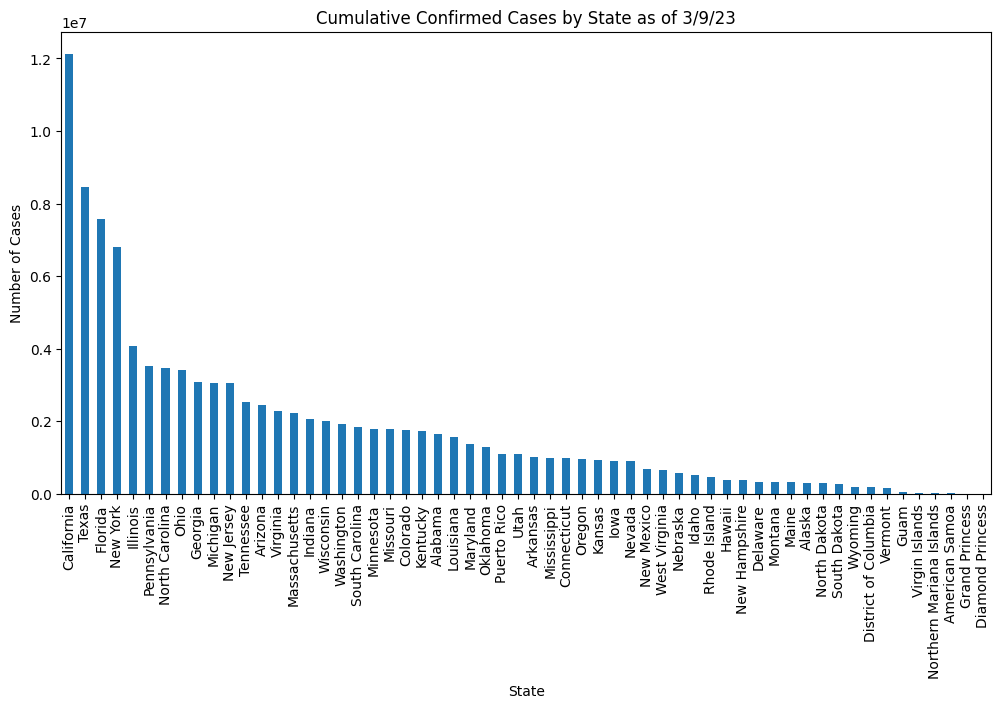

In [5]:
# Cumulative cases by state
latest_date = confirmed_df.columns[-1]
cumulative_cases_by_state = confirmed_df.groupby('Province_State')[latest_date].sum()
cumulative_cases_by_state.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Cumulative Confirmed Cases by State as of ' + latest_date)
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()


In [6]:
!pip install geopandas matplotlib plotly


<ipython-input-7-f48d418a8577>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])


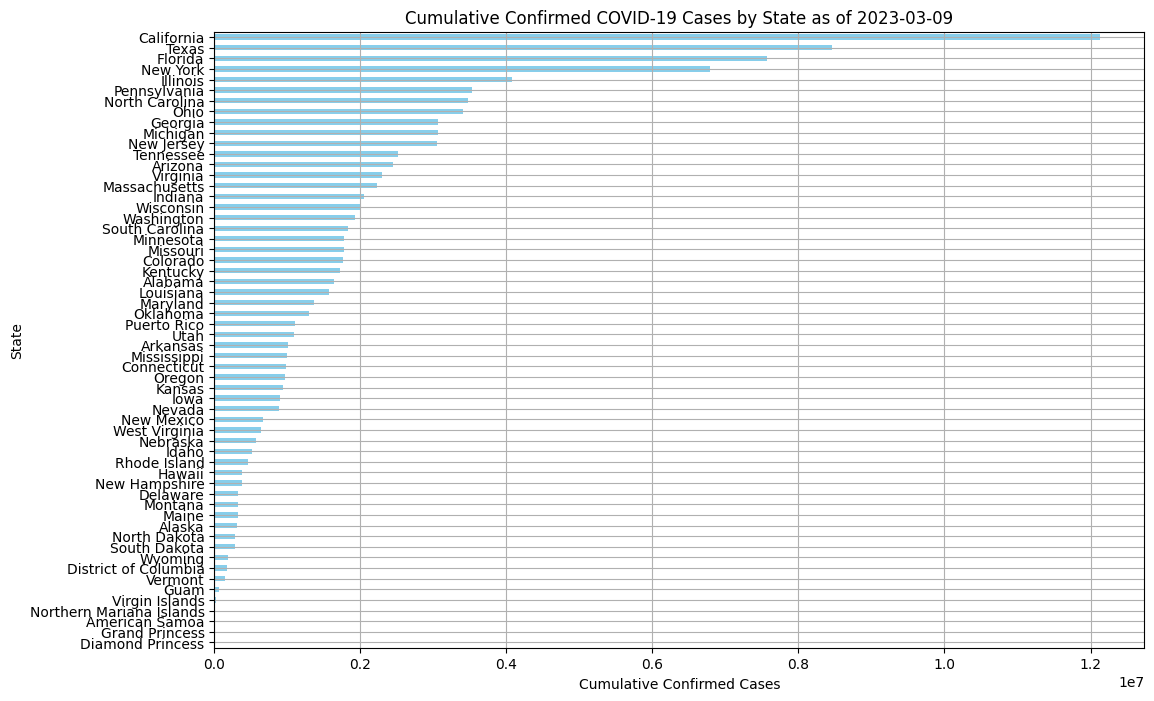

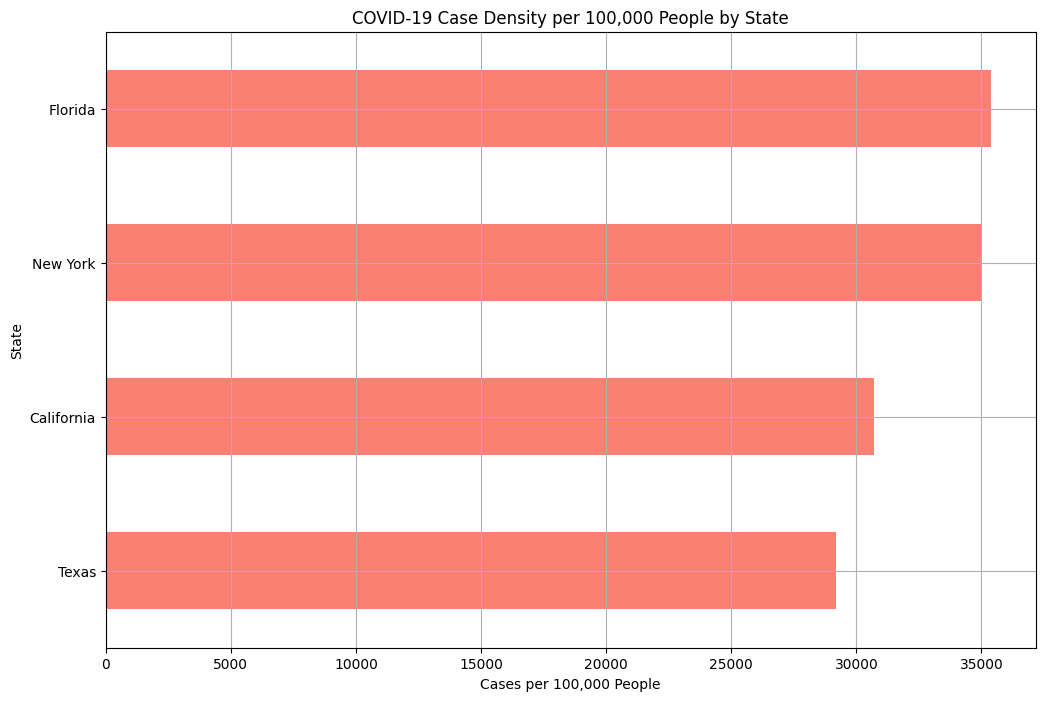

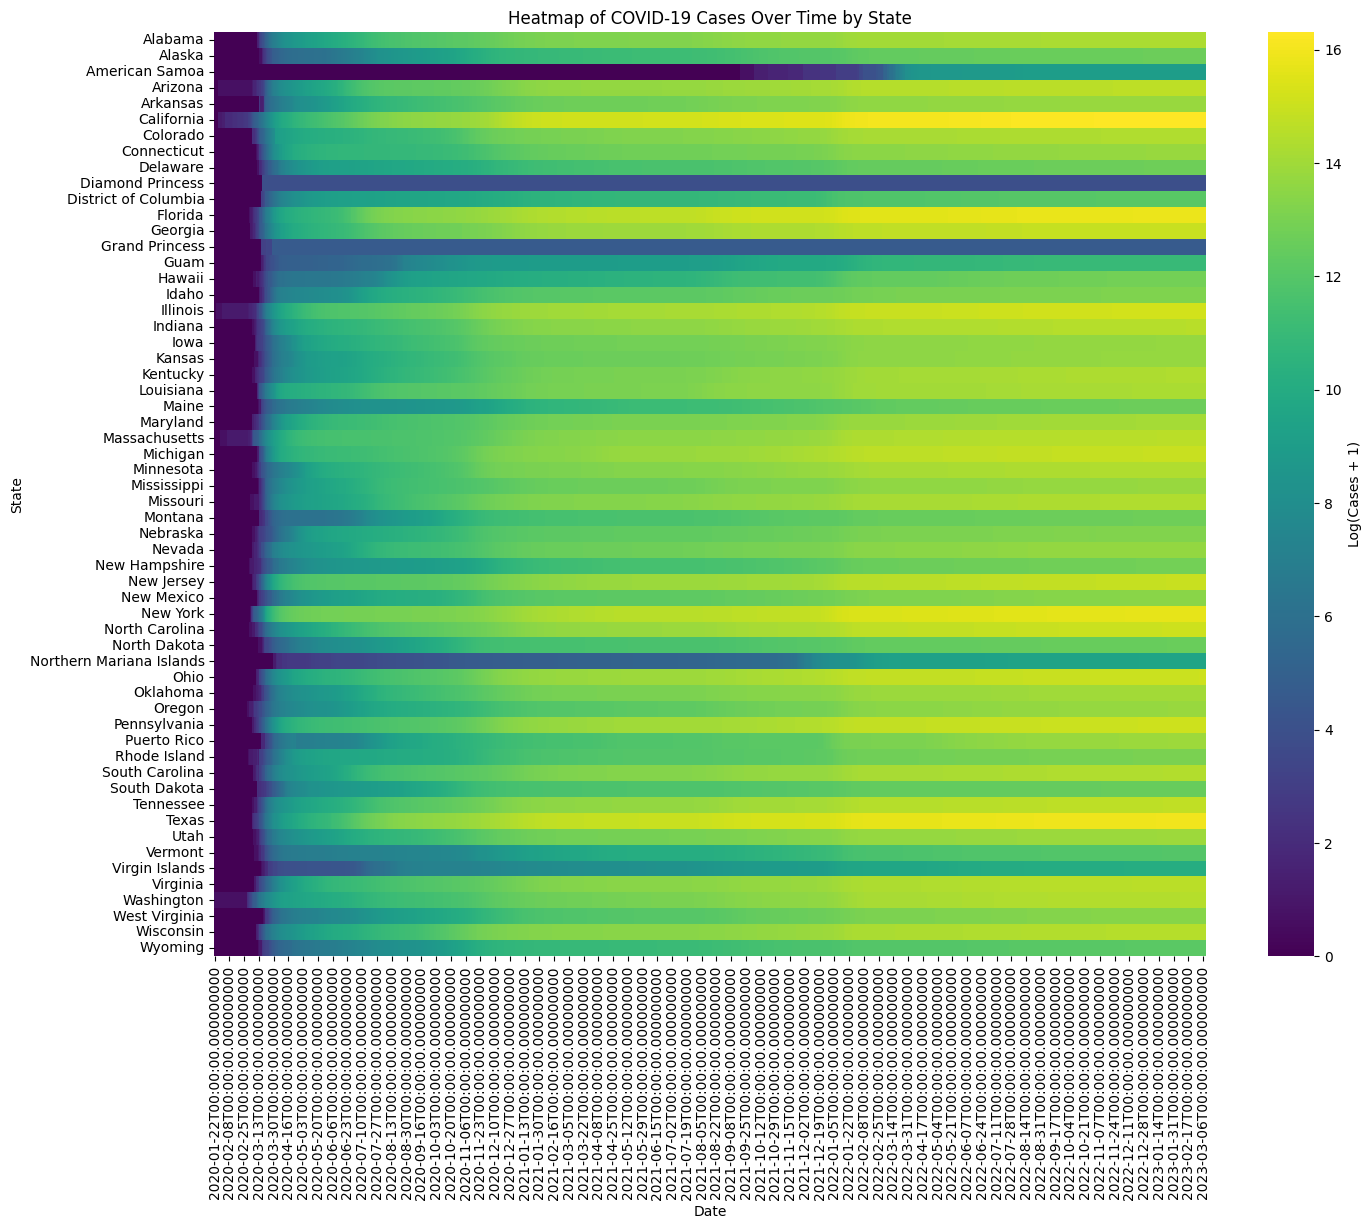

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Convert the wide format data to long format for easier manipulation
date_columns = confirmed_df.columns[11:]  # Columns with date information
confirmed_long = confirmed_df.melt(id_vars=["UID", "Province_State"], value_vars=date_columns, var_name="Date", value_name="Cases")
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])

# Calculate cumulative cases by state for the most recent date
latest_date = confirmed_long['Date'].max()
cumulative_cases_by_state = confirmed_long[confirmed_long['Date'] == latest_date].groupby('Province_State')['Cases'].sum()

# Plot cumulative cases by state as a bar chart
plt.figure(figsize=(12, 8))
cumulative_cases_by_state.sort_values().plot(kind='barh', color='skyblue')
plt.title(f'Cumulative Confirmed COVID-19 Cases by State as of {latest_date.strftime("%Y-%m-%d")}')
plt.xlabel('Cumulative Confirmed Cases')
plt.ylabel('State')
plt.grid(True)
plt.show()

# Calculating case density per 100,000 population
# Assuming population data is loaded into a DataFrame called 'population_df'
# For this example, let's create a mock population data:
population_data = {'California': 39500000, 'Texas': 29000000, 'Florida': 21400000, 'New York': 19400000}  # and so on...
population_df = pd.DataFrame(list(population_data.items()), columns=['Province_State', 'Population'])

# Merging case data with population data
state_cases_with_pop = cumulative_cases_by_state.reset_index()
state_cases_with_pop = state_cases_with_pop.merge(population_df, on='Province_State')
state_cases_with_pop['Cases_per_100k'] = (state_cases_with_pop['Cases'] / state_cases_with_pop['Population']) * 100000

# Plotting case density
plt.figure(figsize=(12, 8))
state_cases_with_pop.set_index('Province_State')['Cases_per_100k'].sort_values().plot(kind='barh', color='salmon')
plt.title('COVID-19 Case Density per 100,000 People by State')
plt.xlabel('Cases per 100,000 People')
plt.ylabel('State')
plt.grid(True)
plt.show()

# Creating a heatmap of cases over time by state
# Pivot table to get cases by state over time
state_date_pivot = confirmed_long.pivot_table(index='Date', columns='Province_State', values='Cases', aggfunc='sum')

# Using seaborn to create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(np.log1p(state_date_pivot.transpose()), cmap='viridis', cbar_kws={'label': 'Log(Cases + 1)'})
plt.title('Heatmap of COVID-19 Cases Over Time by State')
plt.xlabel('Date')
plt.ylabel('State')
plt.show()


In [8]:
!pip install plotly


In [9]:
# Import necessary libraries
import pandas as pd
import plotly.express as px


# Data preprocessing to convert wide format data to long format
date_columns = confirmed_df.columns[11:]  # Adjust based on your dataframe
confirmed_long = confirmed_df.melt(id_vars=["UID", "Province_State"], value_vars=date_columns, var_name="Date", value_name="Cases")
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])

# Interactive Line Chart for State-wise Daily Cases Over Time
# First, sum up the cases by date and state
statewise_daily_cases = confirmed_long.groupby(['Date', 'Province_State']).sum().reset_index()

# Create an interactive line chart
fig = px.line(statewise_daily_cases, x='Date', y='Cases', color='Province_State', title='State-wise Daily COVID-19 Cases Over Time', labels={'Cases': 'Confirmed Cases'})
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Interactive Choropleth Map for Cumulative Cases by State
# Calculate the latest cumulative cases by state
latest_date = confirmed_long['Date'].max()
cumulative_cases_by_state = confirmed_long[confirmed_long['Date'] == latest_date].groupby('Province_State')['Cases'].sum().reset_index()

# Plot using Plotly Express
fig = px.choropleth(cumulative_cases_by_state,
                    locations='Province_State',
                    locationmode="USA-states",
                    color='Cases',
                    hover_name='Province_State',
                    color_continuous_scale='Reds',
                    scope="usa",
                    title='Cumulative COVID-19 Cases by State as of ' + latest_date.strftime('%Y-%m-%d'))
#fig.show()


<ipython-input-9-f04bc4550936>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
